In [1]:
# Needed modules
import os
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# insert project code to path so we can import it
sys.path.insert(0, os.path.abspath('../src'))
from sudoku import Sudoku
import datautils

% matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
DATA_DIR = '../data'
TRAIN_DIR = os.path.join(DATA_DIR, 'train_data')

train_paths = datautils.get_filenames(TRAIN_DIR, extensions=['jpg'])
len(train_paths)

160

  0%|          | 0/1 [00:00<?, ?it/s]

Processed grid: (288, 288)


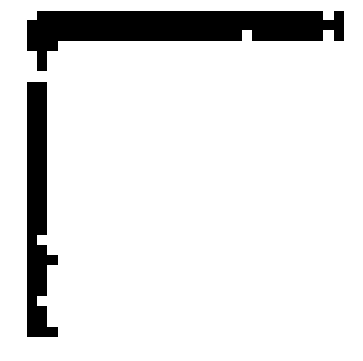

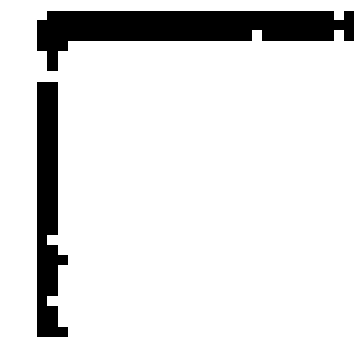

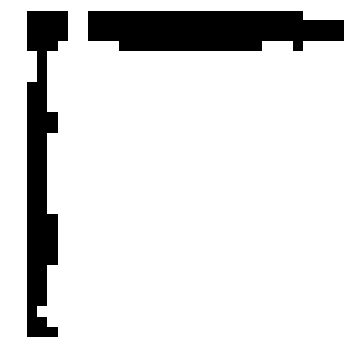

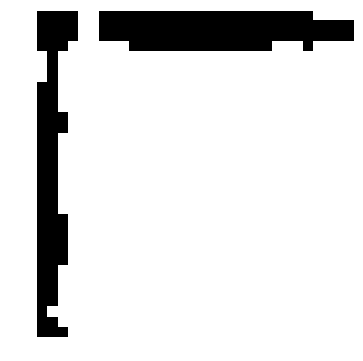

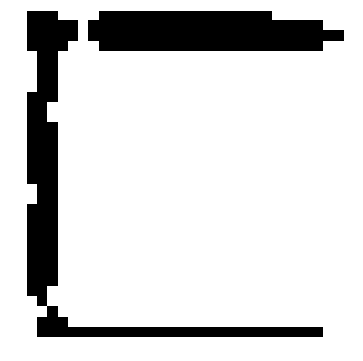

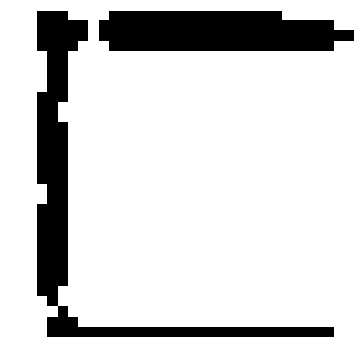

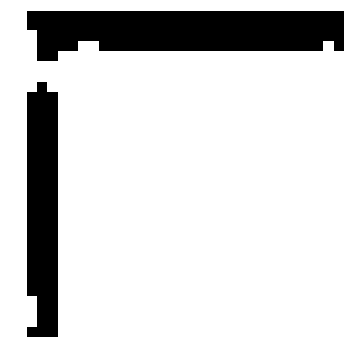

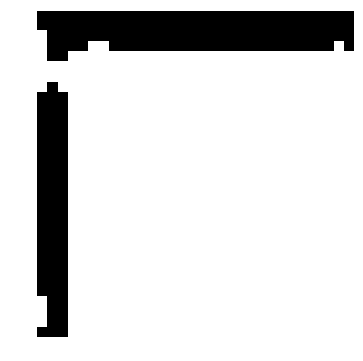

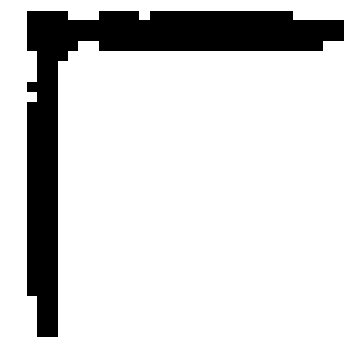

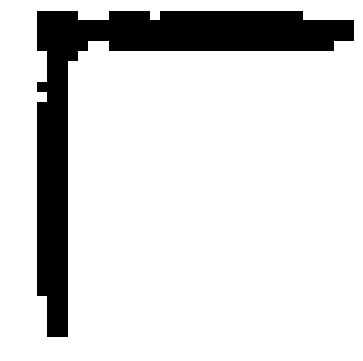

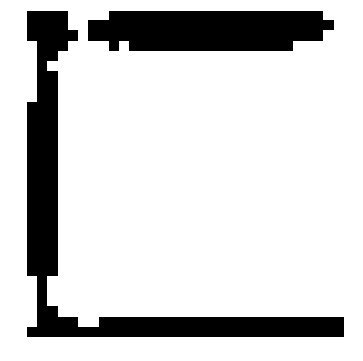

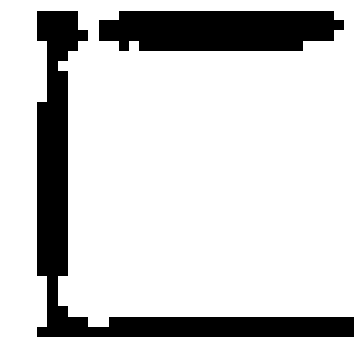

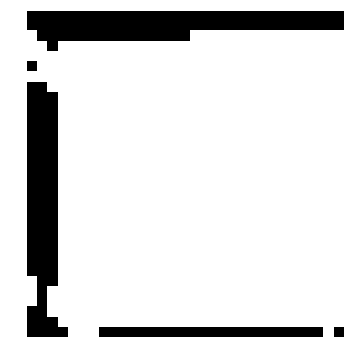

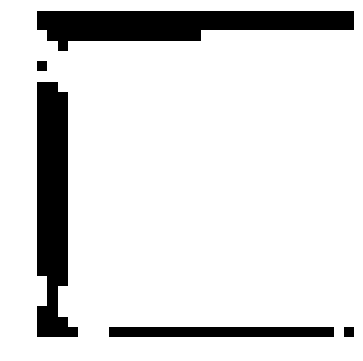

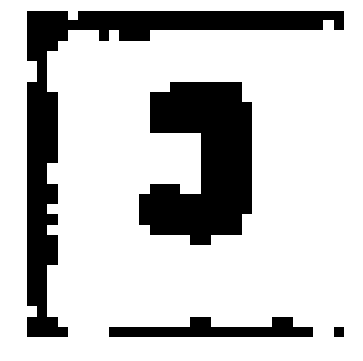

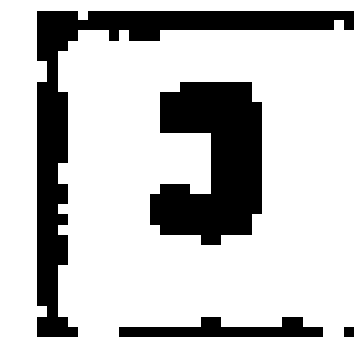

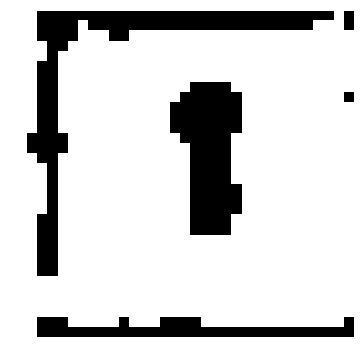

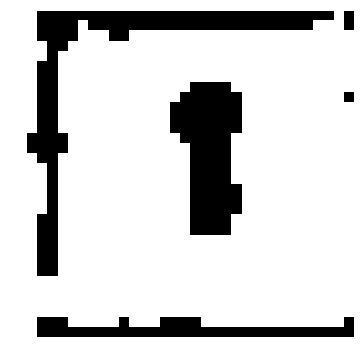

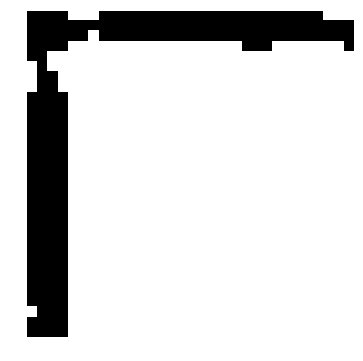

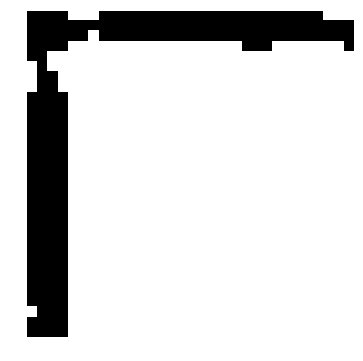

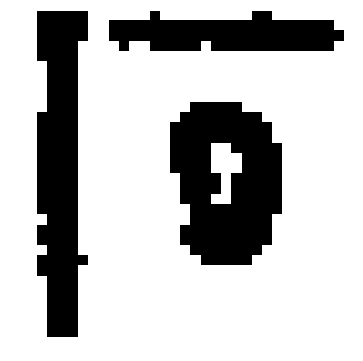

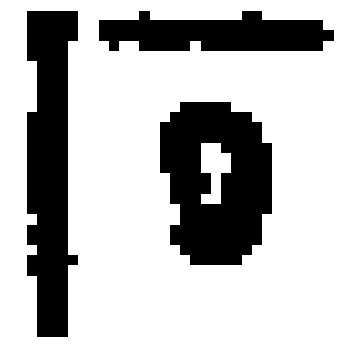

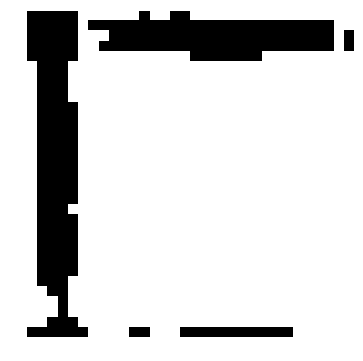

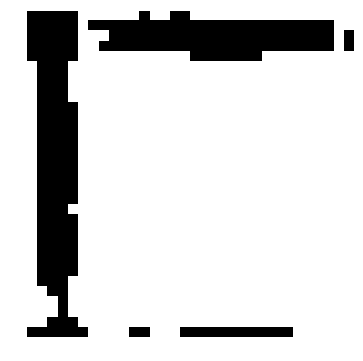

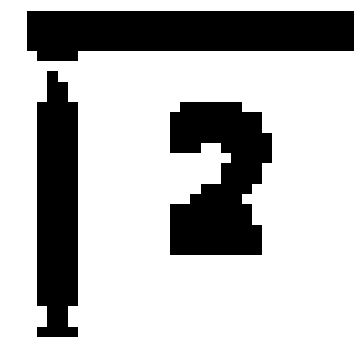

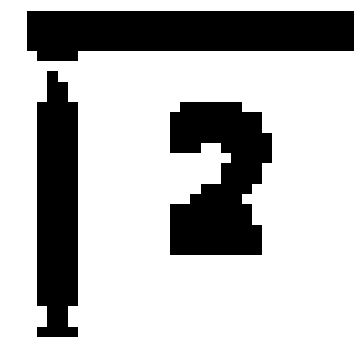

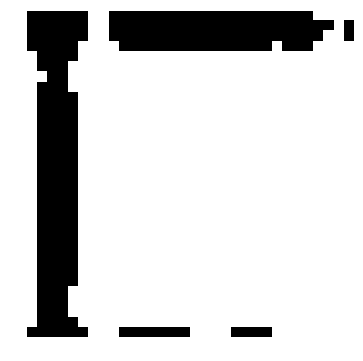

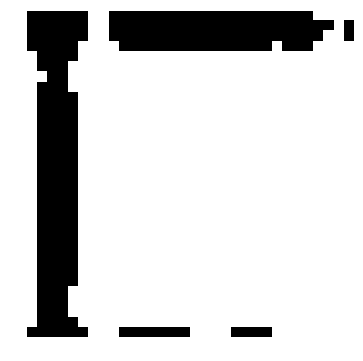

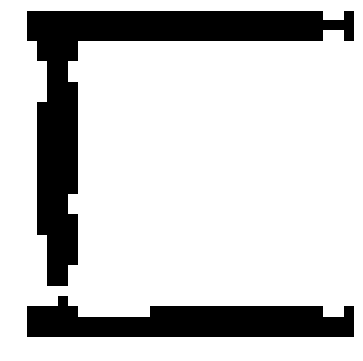

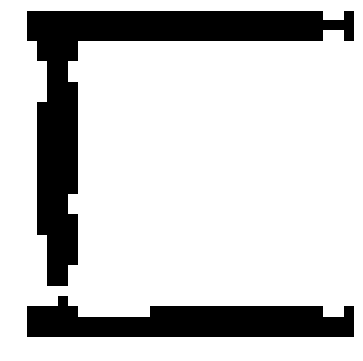

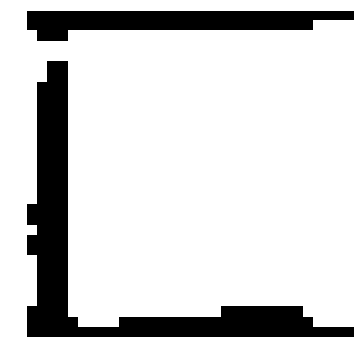

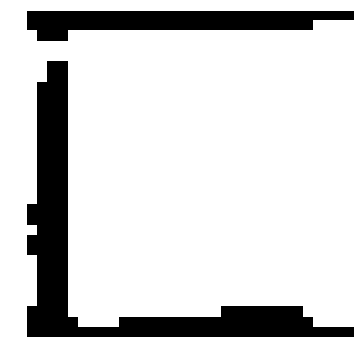

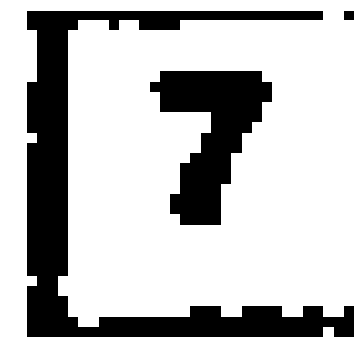

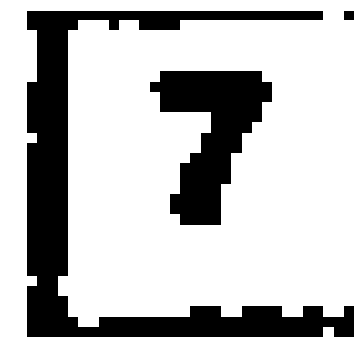

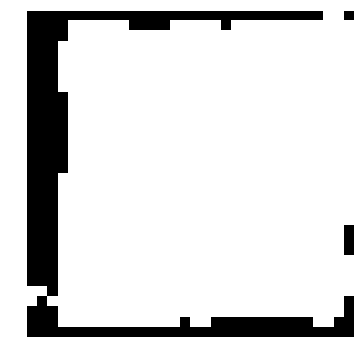

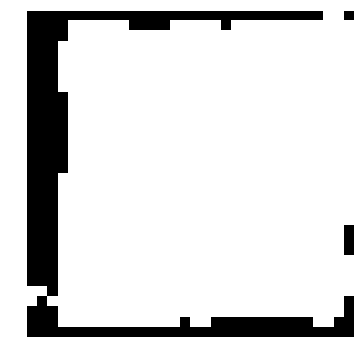

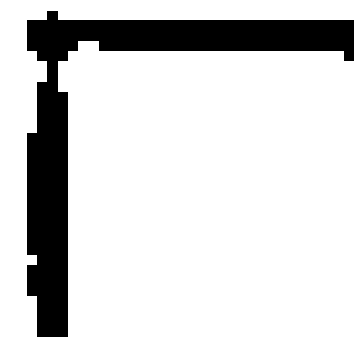

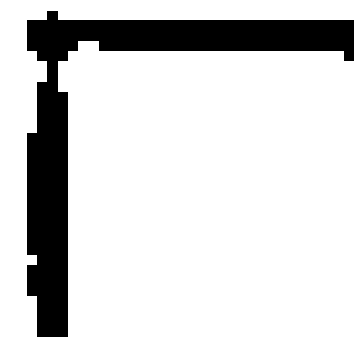

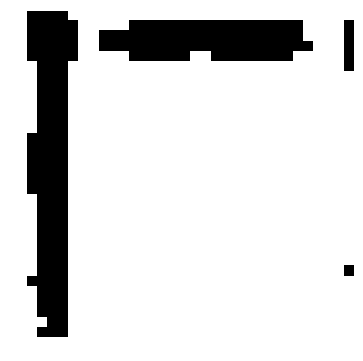

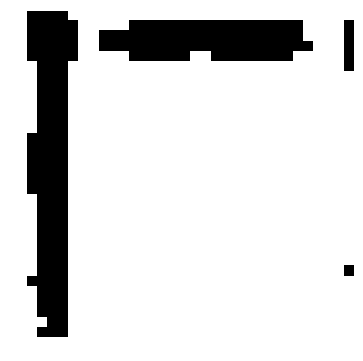

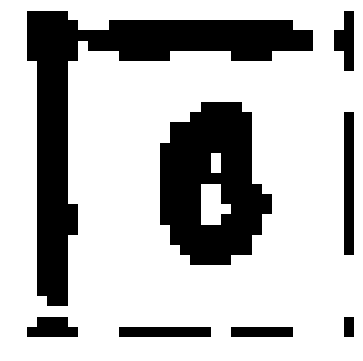

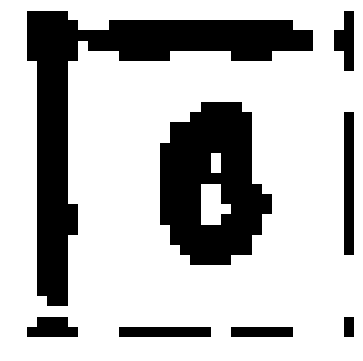

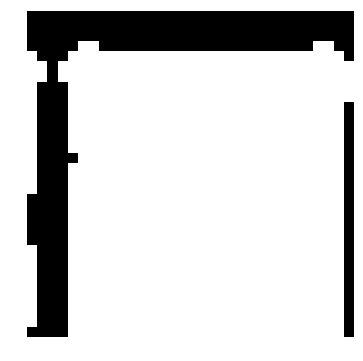

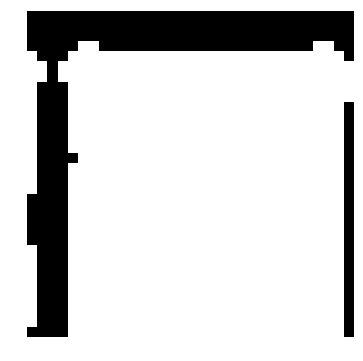

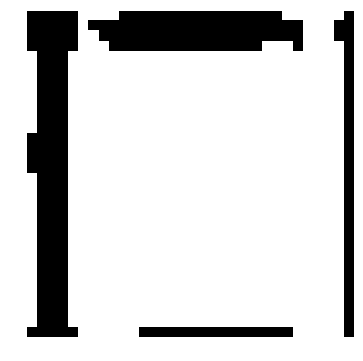

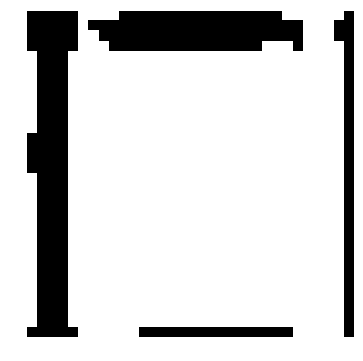

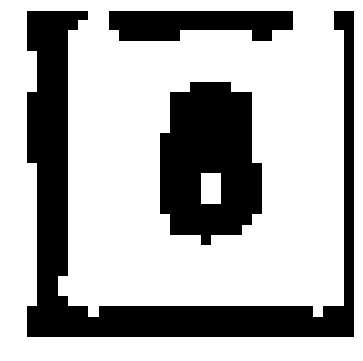

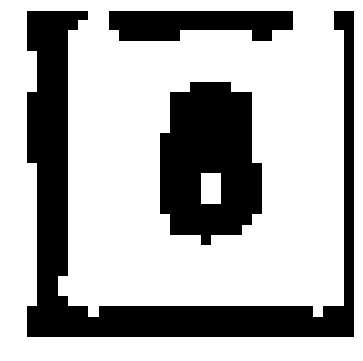

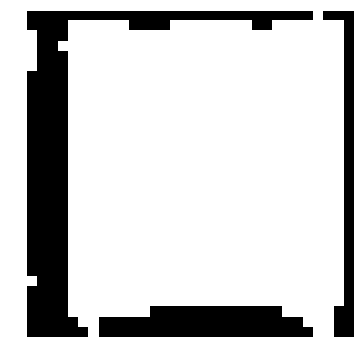

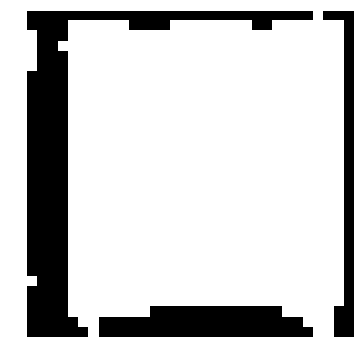

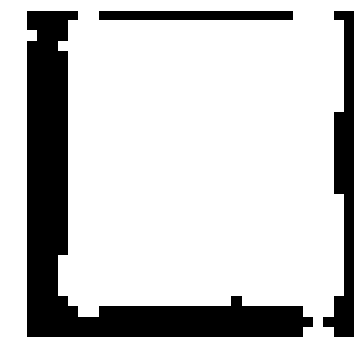

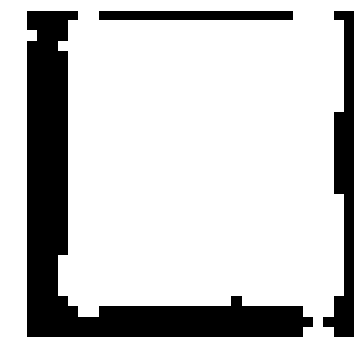

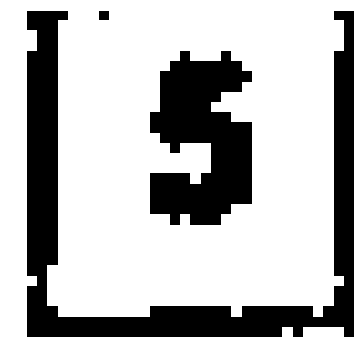

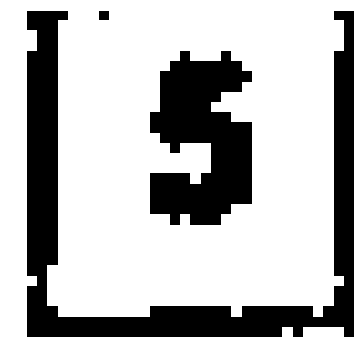

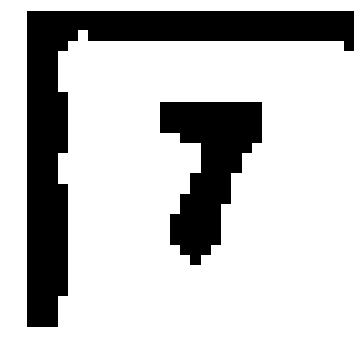

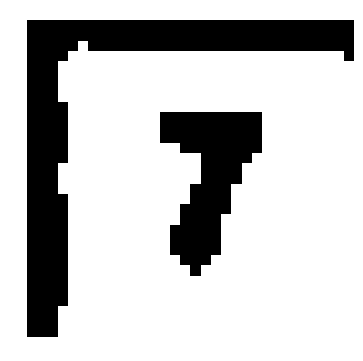

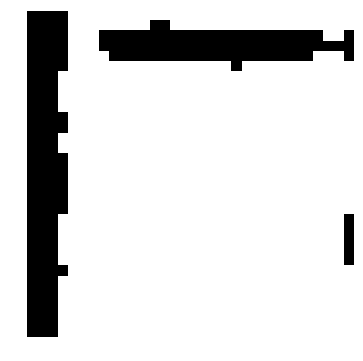

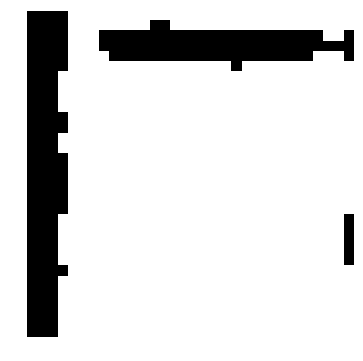

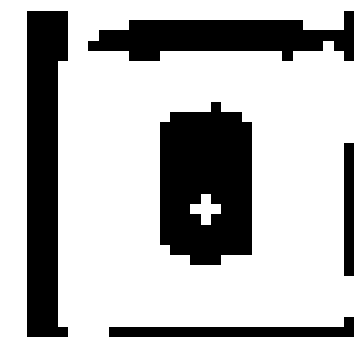

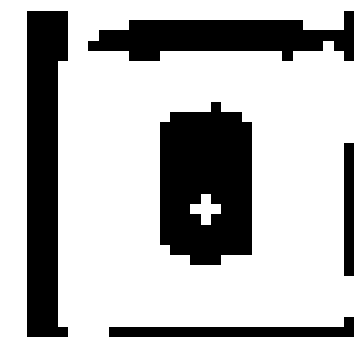

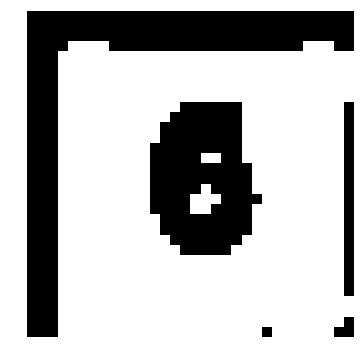

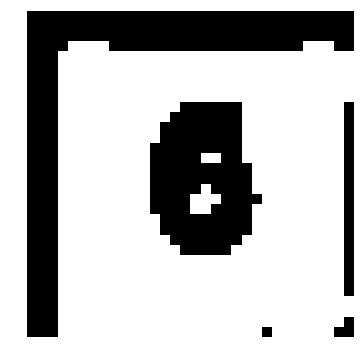

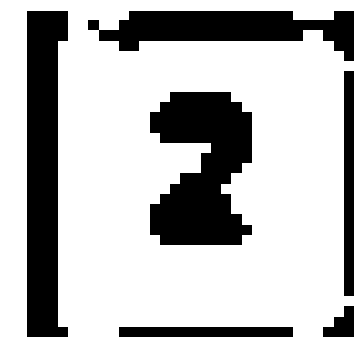

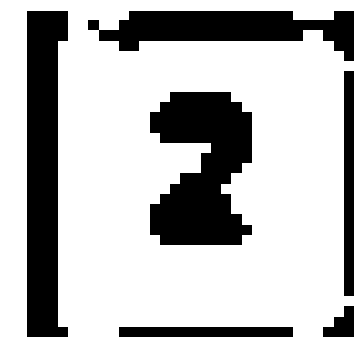

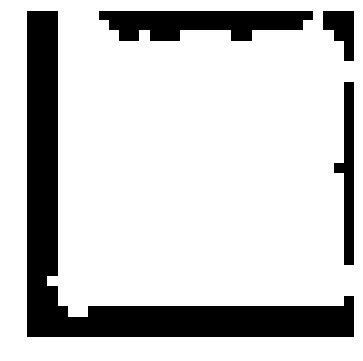

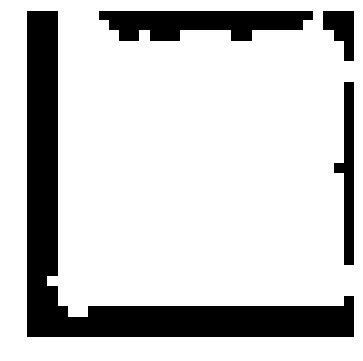

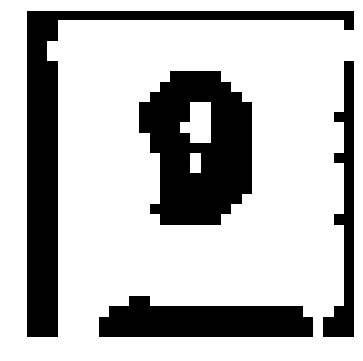

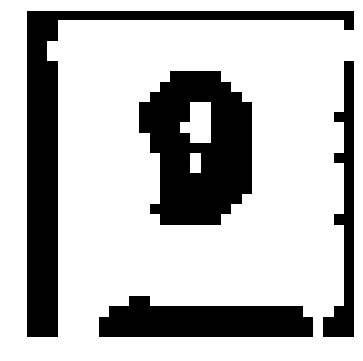

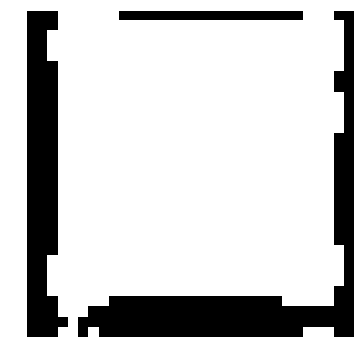

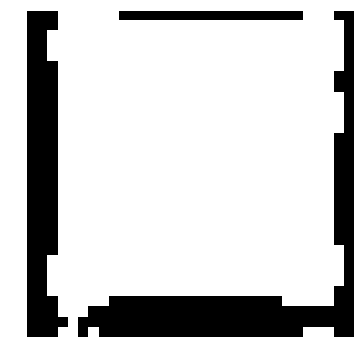

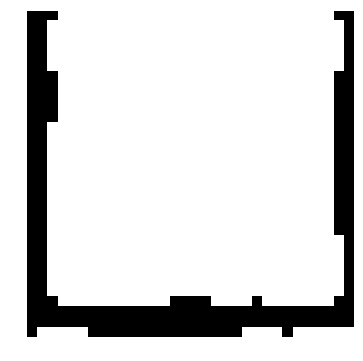

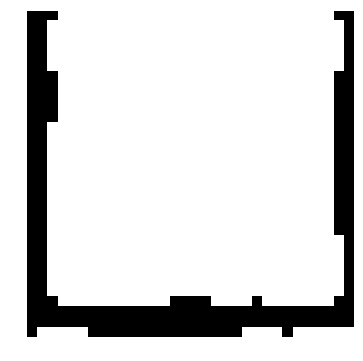

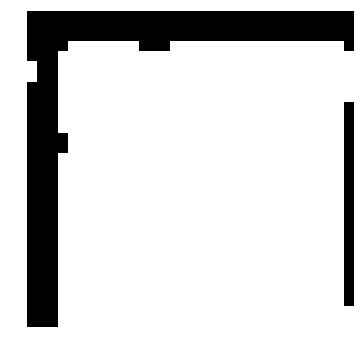

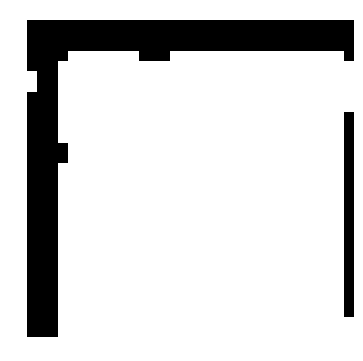

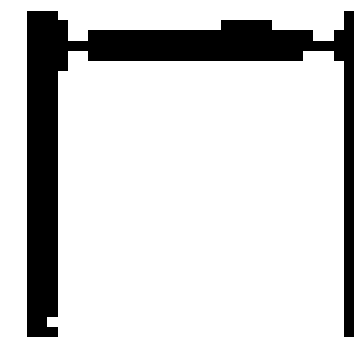

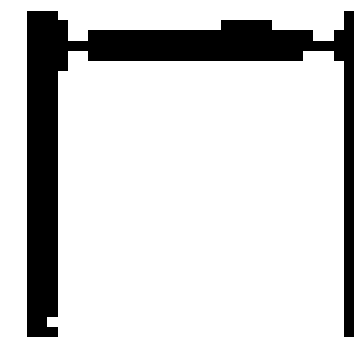

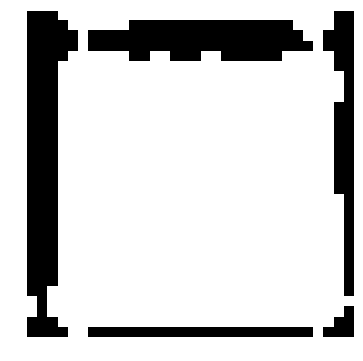

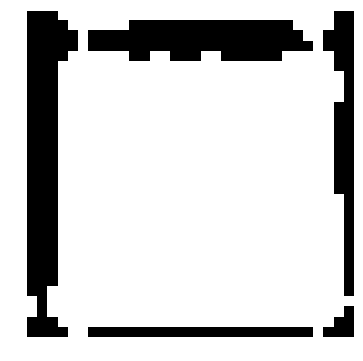

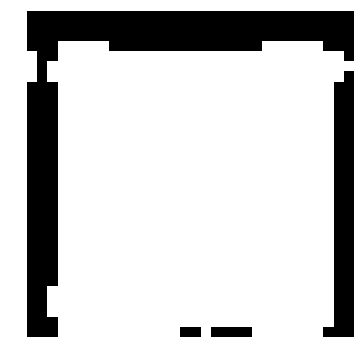

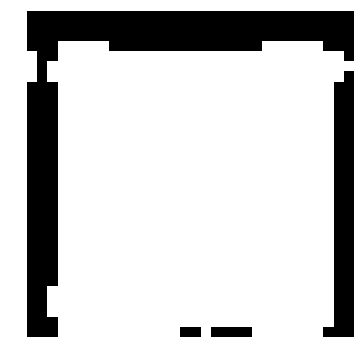

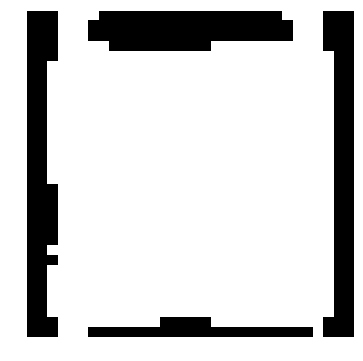

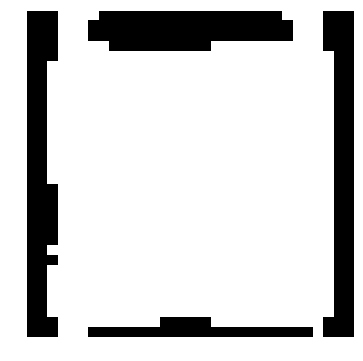

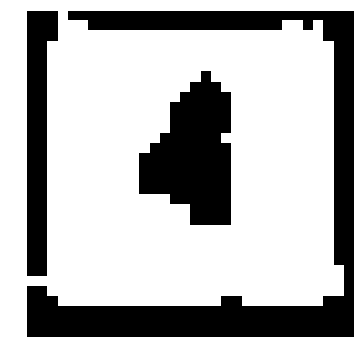

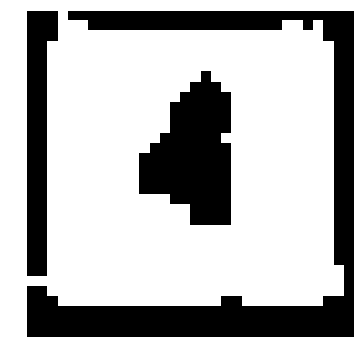

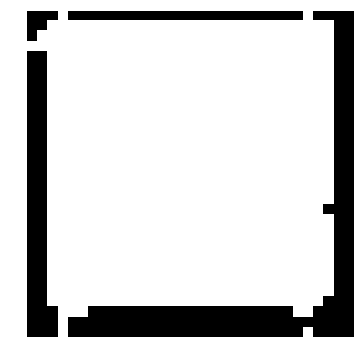

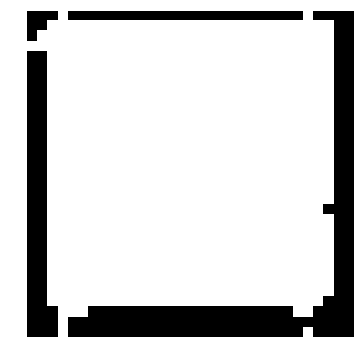

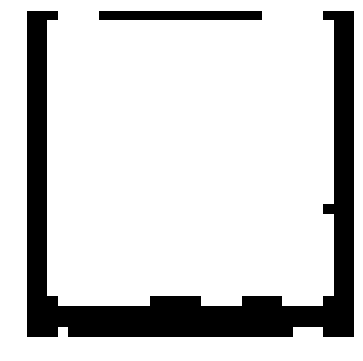

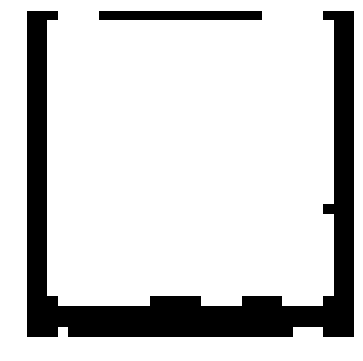

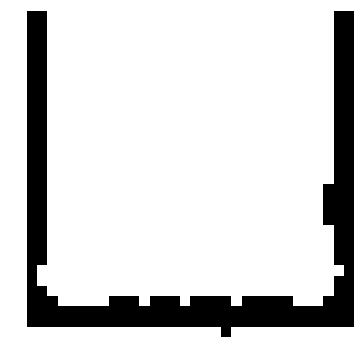

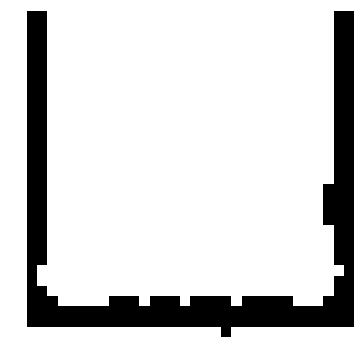

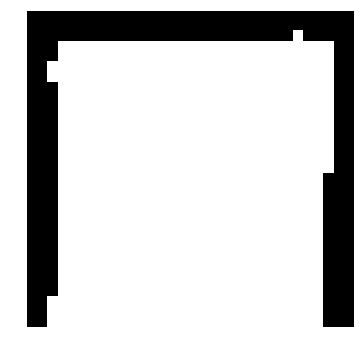

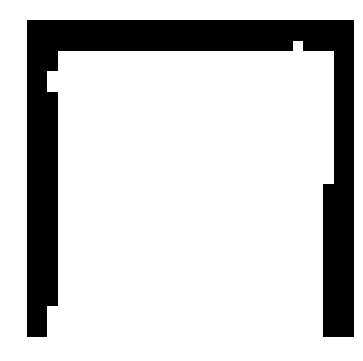

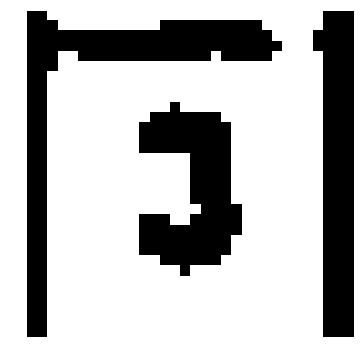

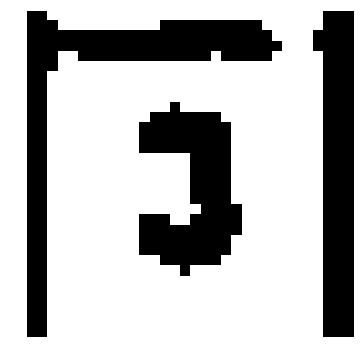

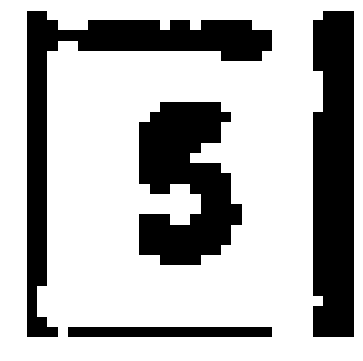

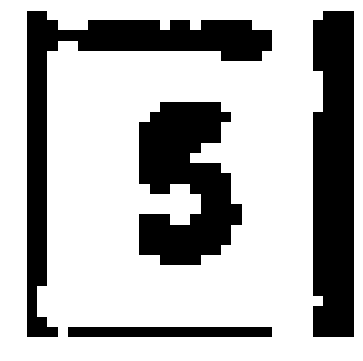

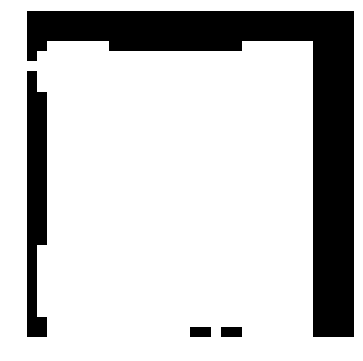

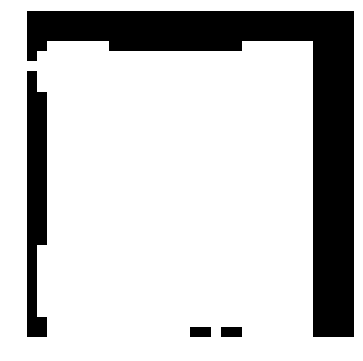

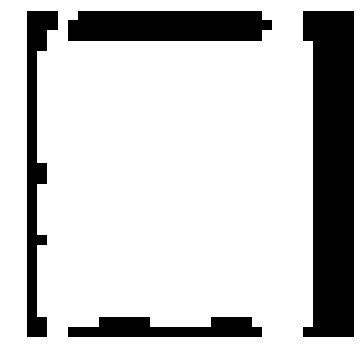

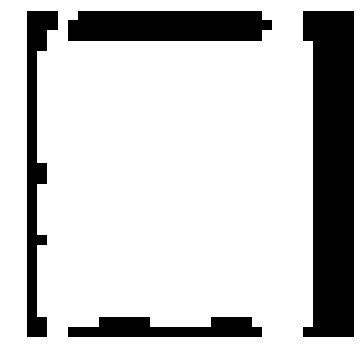

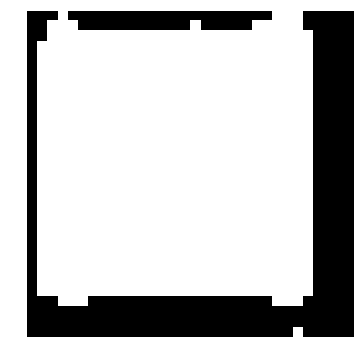

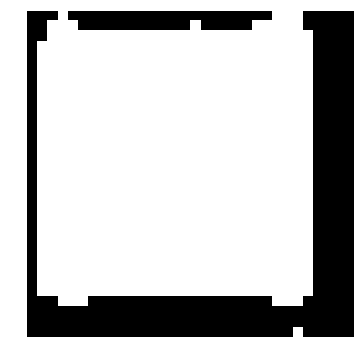

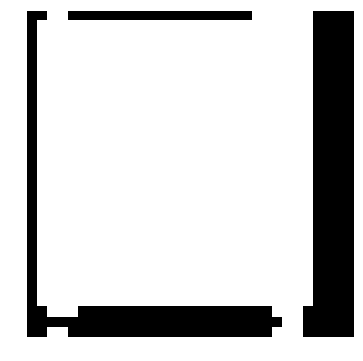

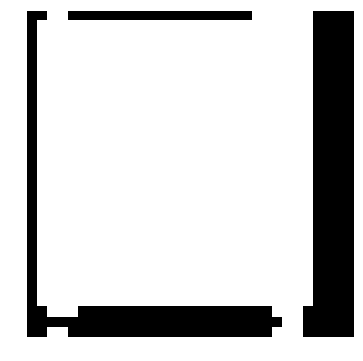

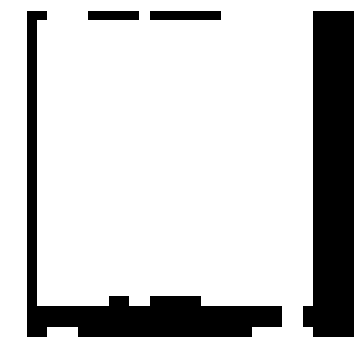

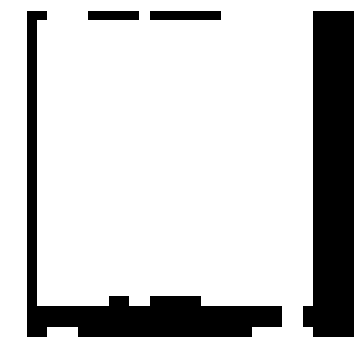

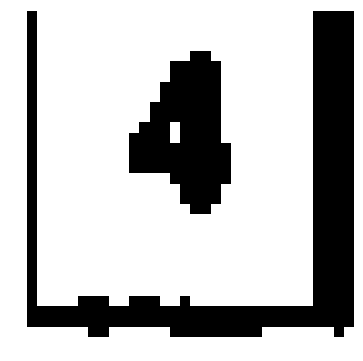

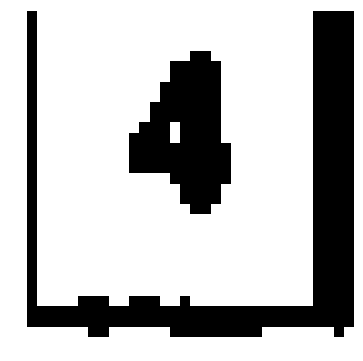

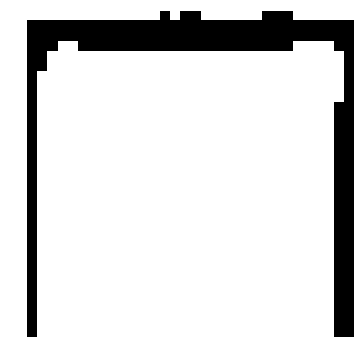

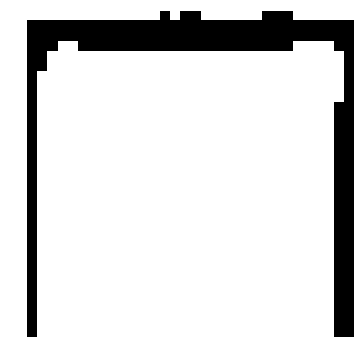

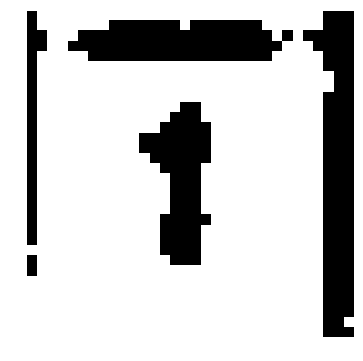

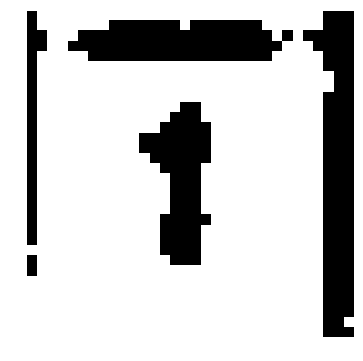

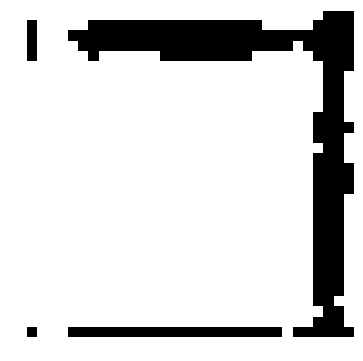

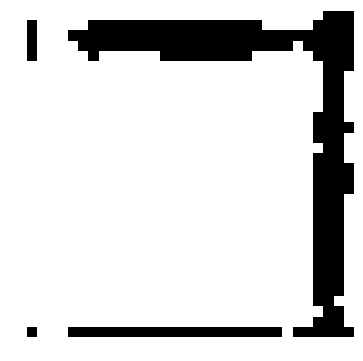

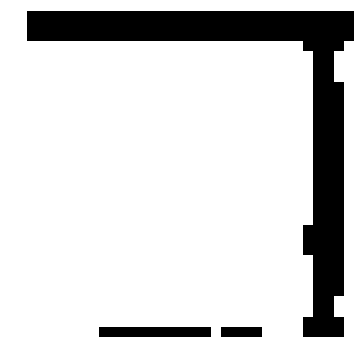

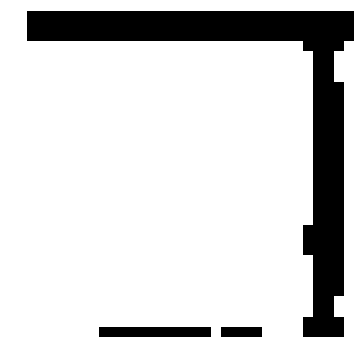

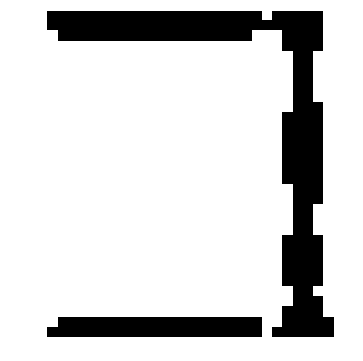

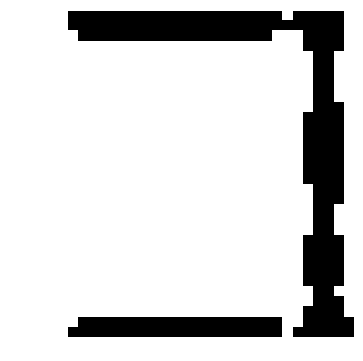

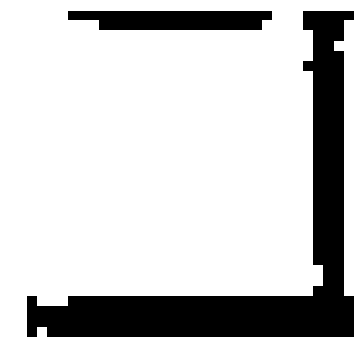

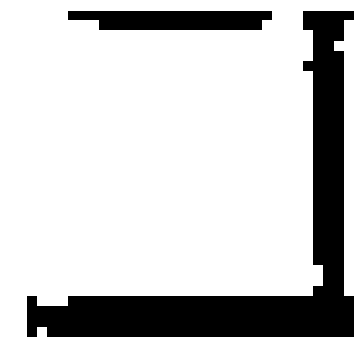

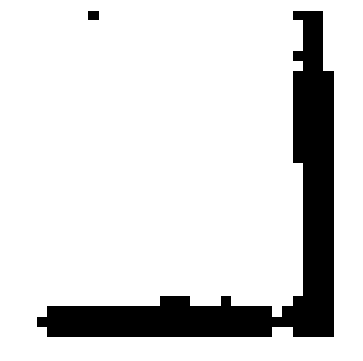

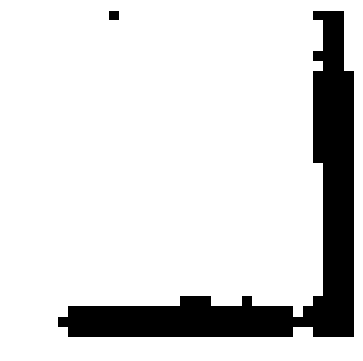

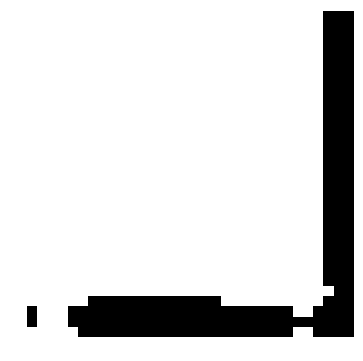

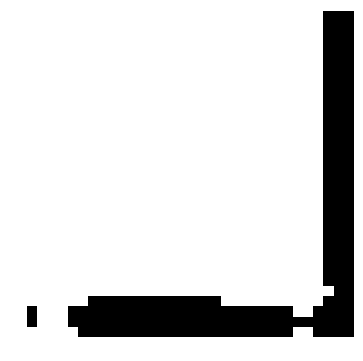

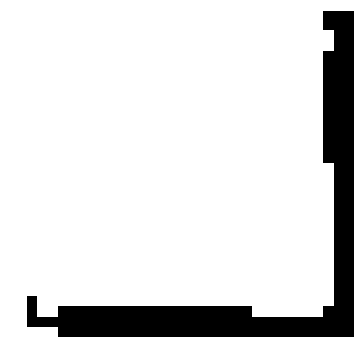

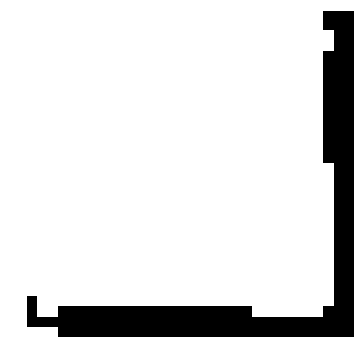

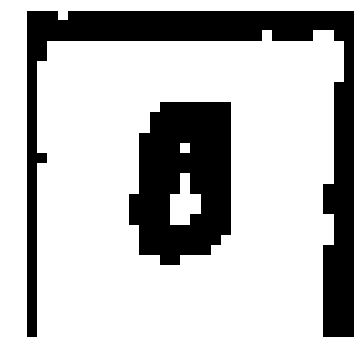

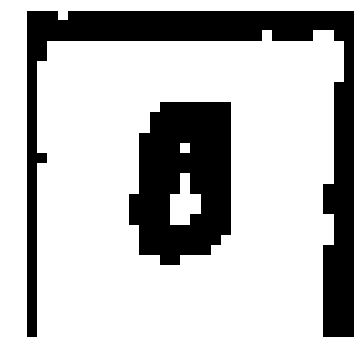

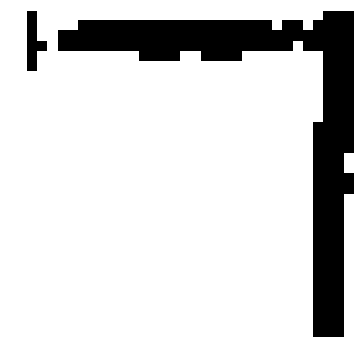

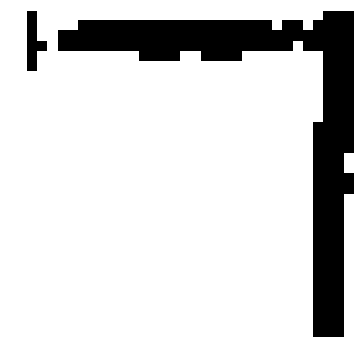

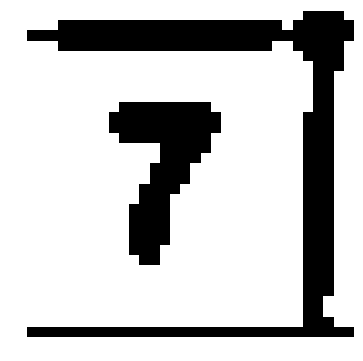

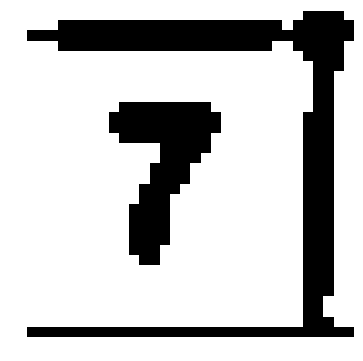

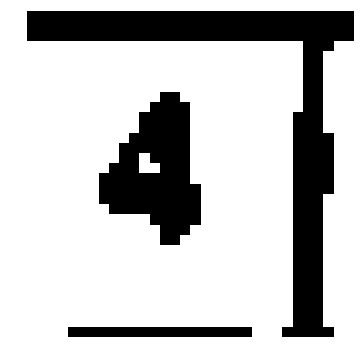

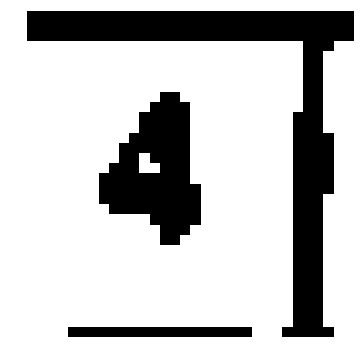

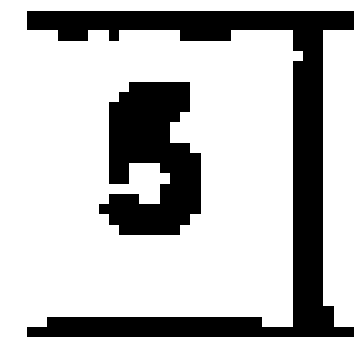

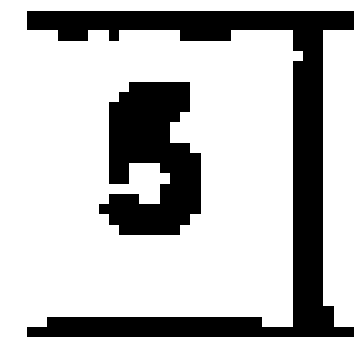

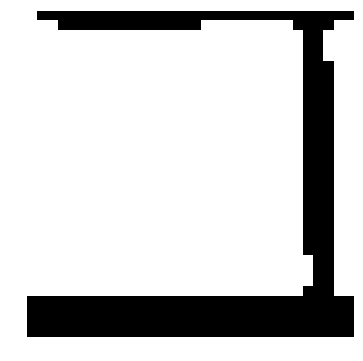

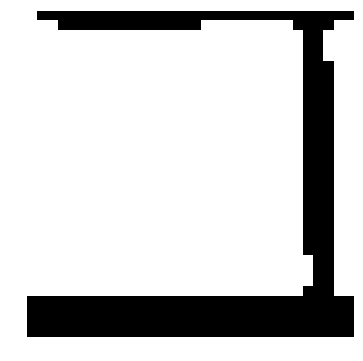

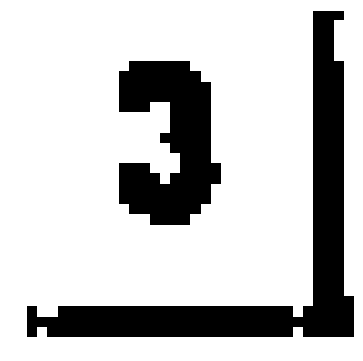

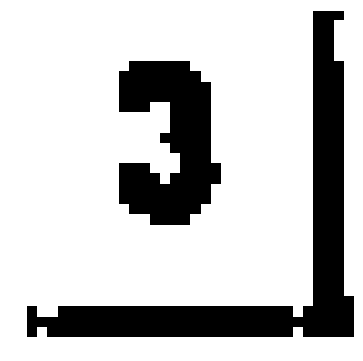

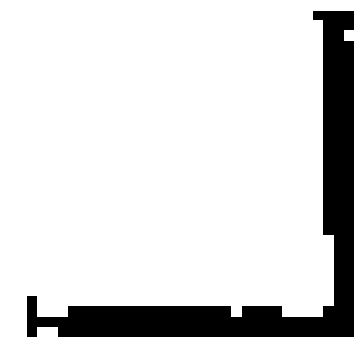

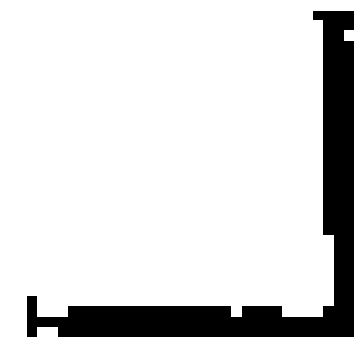

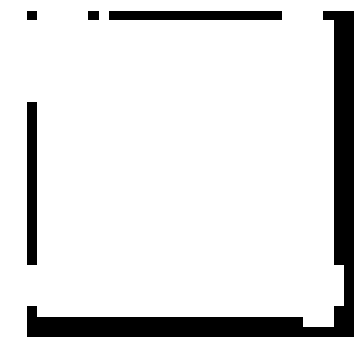

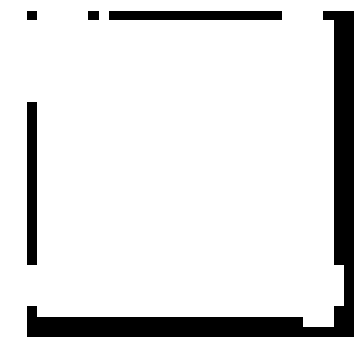

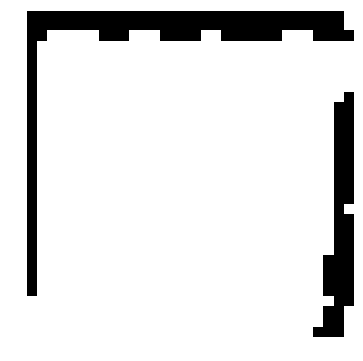

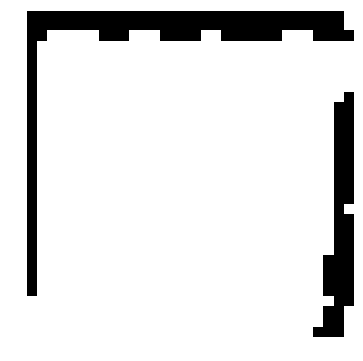

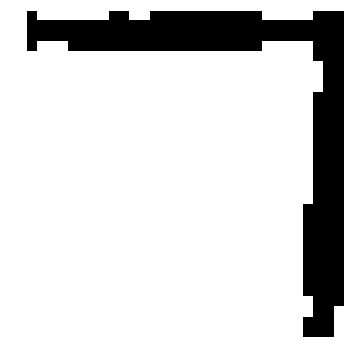

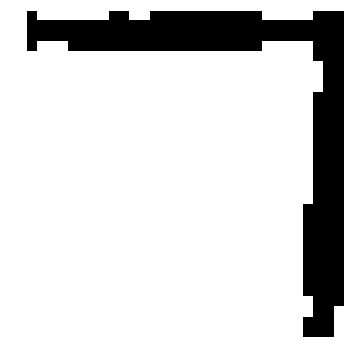

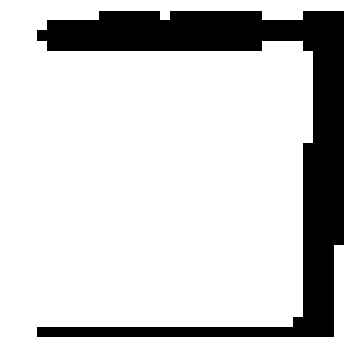

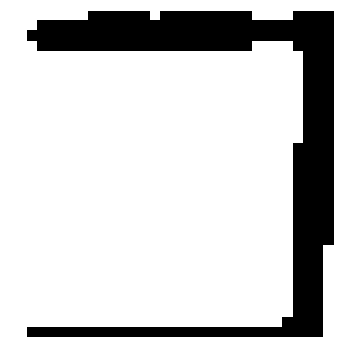

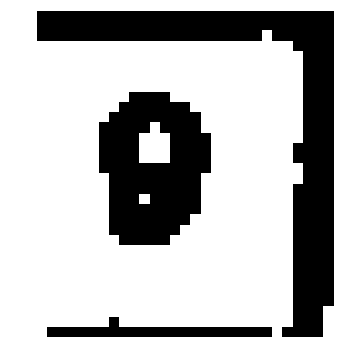

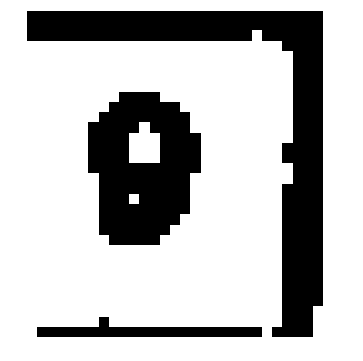

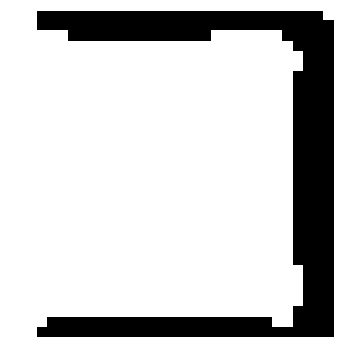

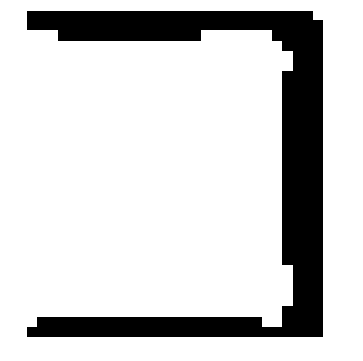

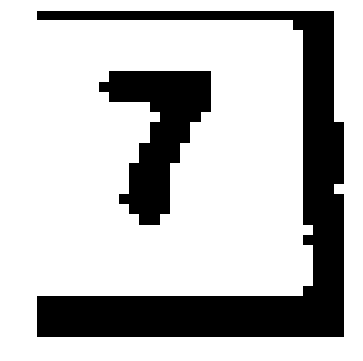

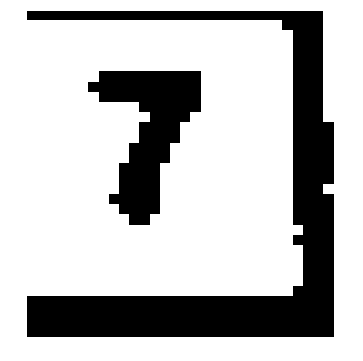

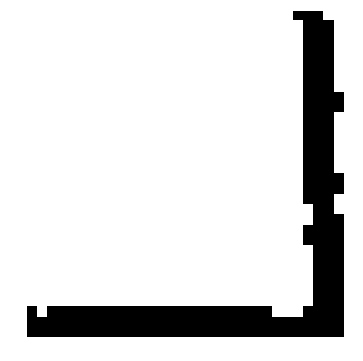

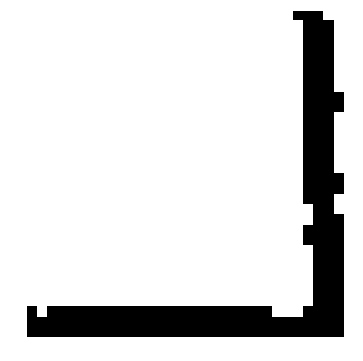

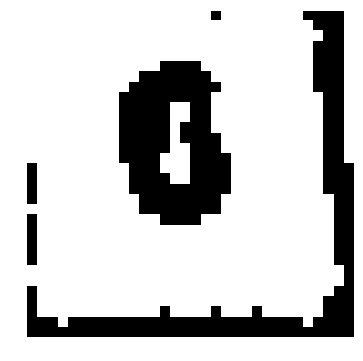

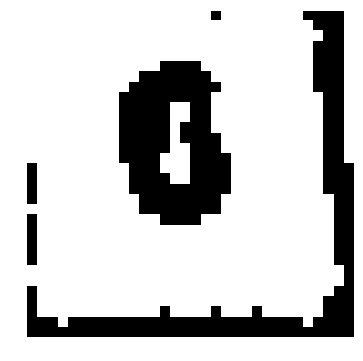

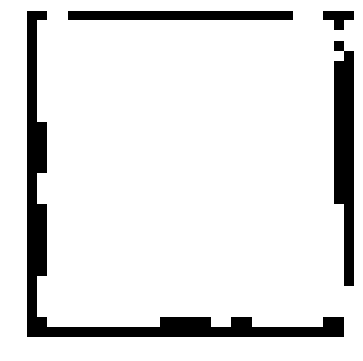

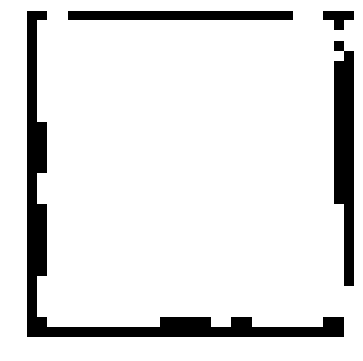

100%|██████████| 1/1 [00:11<00:00, 11.35s/it]


In [3]:
from tqdm import tqdm

sudokus = []

for path in tqdm(train_paths[:1]):
    sudoku = Sudoku(path)
    sudoku.preprocess_digits()
    sudokus.append(sudoku)

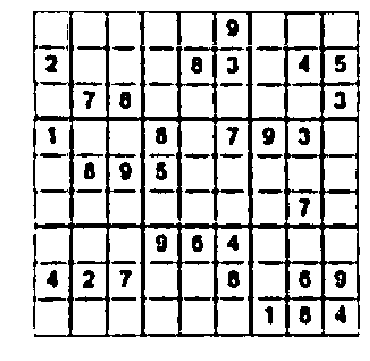

In [65]:
vis.show_img(sudoku.cleaned)

In [21]:
sud = Sudoku(train_paths[0])

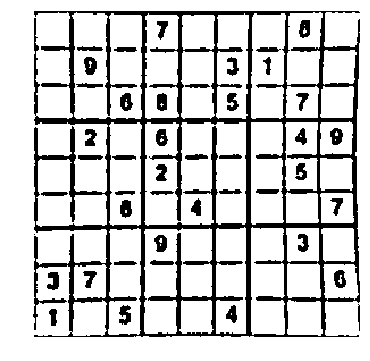

In [24]:
import vis
vis.show_img(sud.processed_grid)

In [23]:
sud.preprocess_transformed()

In [25]:
sud.preprocess_digits()

ValueError: could not broadcast input array from shape (288,288) into shape (32,32,3)

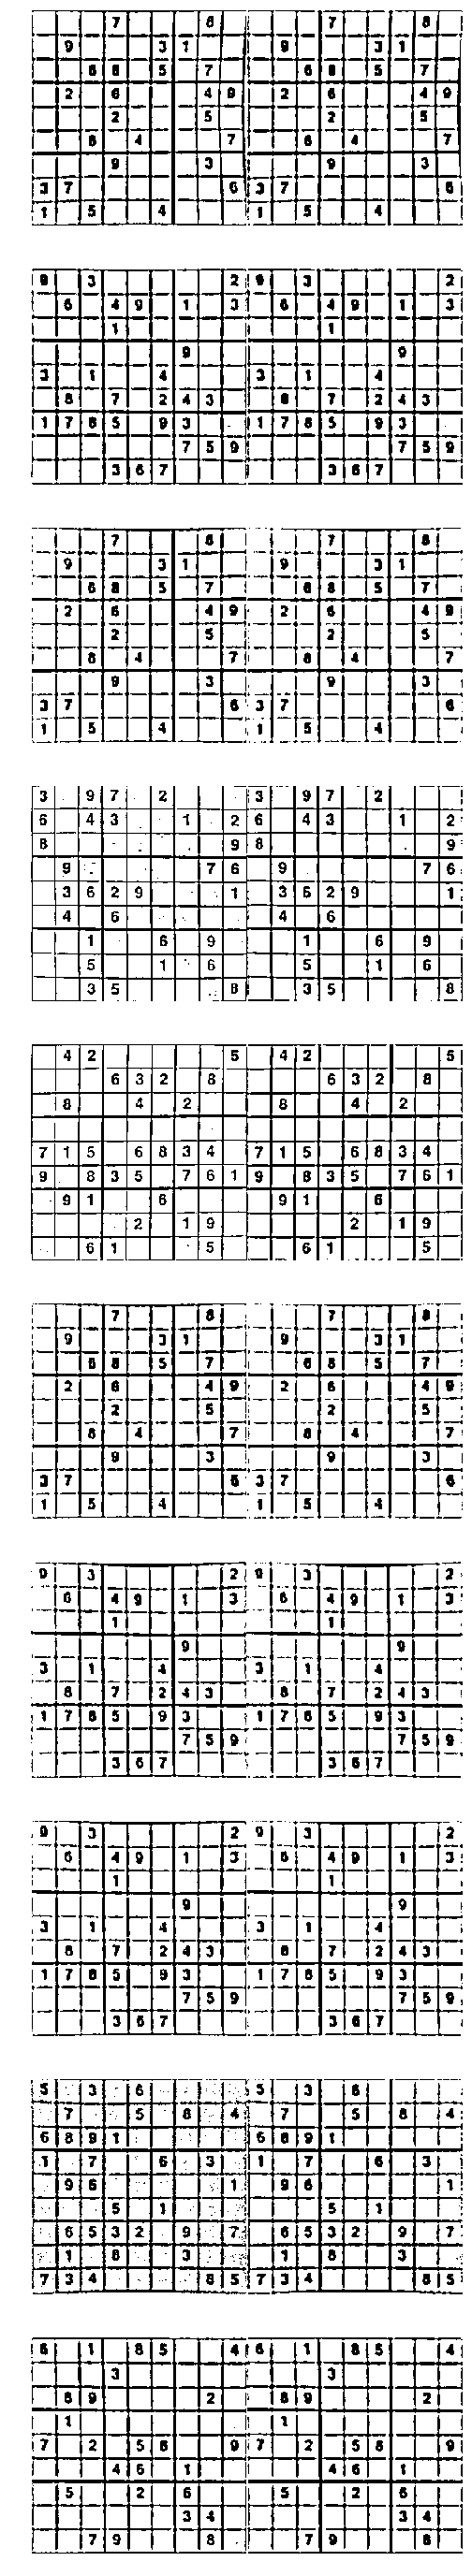

In [6]:
import vis

def preprocess_grid(img, param):
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    if param:
        img = cv2.blur(img, (3, 3))
    img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                cv2.THRESH_BINARY, 19, 5)
    return img


params = [False, True]

suds = sudokus[:10]

plt.figure(figsize=(50, 50))
n_rows = len(suds)
n_cols = 1
for i, sudoku in enumerate(suds):
    grid = sudoku.grid.copy()
    processed = [preprocess_grid(grid, p) for p in params]

    concat = np.concatenate(processed, axis=1)
    plt.subplot(n_rows, n_cols, i + 1)
    plt.axis('off')
    plt.imshow(concat, cmap='gray')



In [1]:
[1:2, 3:4]

SyntaxError: invalid syntax (<ipython-input-1-ee0f4c465996>, line 1)